<a href="https://colab.research.google.com/github/mailythompson/BME3053C/blob/main/lessons-solved/supervised_homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digit Classification
##### In this assignment, you will work with the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/) to implement and compare two supervised learning algorithms: Logistic Regression and Neural Networks. You will gain hands-on experience with data preprocessing, model training, evaluation, and visualization techniques commonly used in machine learning.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys

    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn


Missing package: 'sklearn'
Installing required packages...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 33.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 28.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Part 1: Data Loading and Exploration (4 points)
1. Load the MNIST dataset using fetch_openml
2. Print the following dataset characteristics:
   - Dataset dimensions and size
   - Number of classes
3. Visualize sample digits from the dataset


In [ ]:
#Provide your code for part 1-1 here
# Load MNIST dataset
# Make sure to run imports first
from sklearn.datasets import fetch_openml

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Convert data to float32 for better memory efficiency
X = X.astype('float32')

Dataset dimensions: (70000, 784)
Number of samples: 70000
Number of features: 784
Number of unique classes: 10


In [ ]:
#Provide your code for part 1-2 here
# Print dataset dimensions
print("Dataset dimensions:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"\nTotal dataset size: {X.size} elements")

# Print number of unique classes
unique_classes = len(pd.Series(y).unique())
print(f"\nNumber of classes: {unique_classes}")


Dataset dimensions:
Number of samples: 70000
Number of features: 784

Total dataset size: 54880000 elements

Number of classes: 10


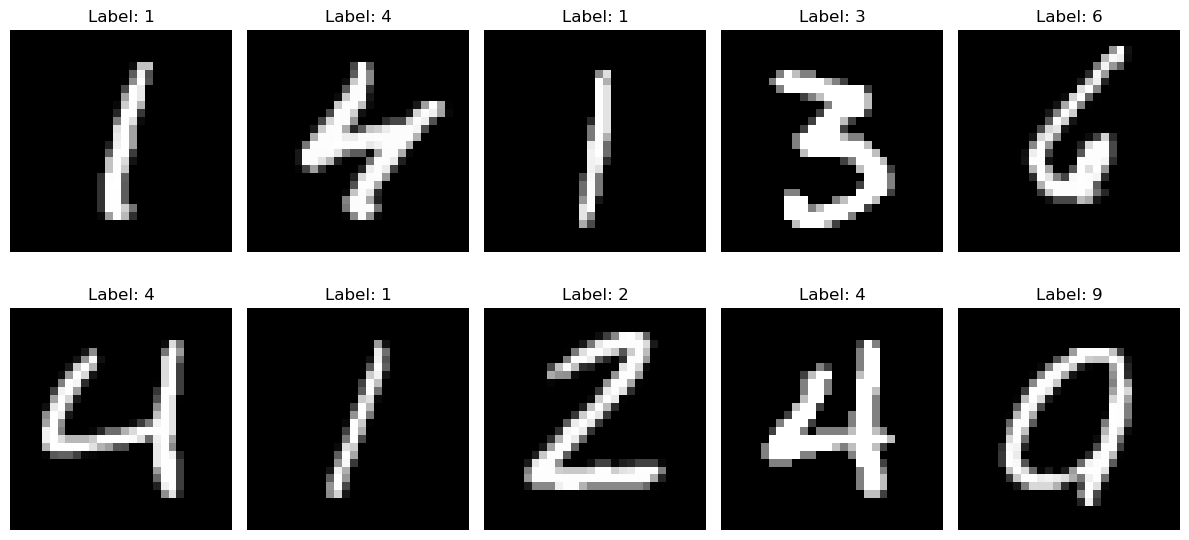

In [ ]:
#Provide your code for part 1-3 here

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()  # Flatten the 2x5 array of axes

# Select 10 random samples
random_indices = np.random.randint(0, X.shape[0], 10)

# Plot each digit
for idx, ax in enumerate(axes):
    # Reshape the image data from 1D to 2D (28x28 pixels)
    image = X[random_indices[idx]].reshape(28, 28)

    # Display the image
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {y[random_indices[idx]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Part 2: Data Preprocessing (4 points)
1. Scale the pixel values to range [0,1] by dividing by 255
2. Split the data into training (80%) and testing (20%) sets
3. Create a StandardScaler object and fit it on the training data
4. Transform both training and test data using the fitted scaler
5. Print the shapes of the resulting training and test sets


In [ ]:
# Add these imports at the top with your other imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale pixel values to range [0,1]
X = X / 255.0

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Combined fit and transform for training data
X_test_scaled = scaler.transform(X_test)  # Only transform for test data

# Print shapes of training and test sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nScaled training set shape:", X_train_scaled.shape)
print("Scaled testing set shape:", X_test_scaled.shape)


Training set shape: (56000, 784)
Testing set shape: (14000, 784)

Scaled training set shape: (56000, 784)
Scaled testing set shape: (14000, 784)


### Part 3: Model Training and Evaluation (8 points)
1. Train a Logistic Regression model using the training data. Use the default parameters.
2. Train a Neural Network model using the training data. The neural network should have 2 hidden layers with 100 and 50 neurons respectively. Use the Adam optimizer and a learning rate of 0.001.

In [ ]:
# Provide your code for part 3-1 here
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate accuracy
lr_accuracy = lr_model.score(X_test_scaled, y_test)
print(f"Logistic Regression Test Accuracy: {lr_accuracy:.4f}")


Logistic Regression Test Accuracy: 0.9156


In [ ]:
# Provide your code for part 3-2 here
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create and train Neural Network model
nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    random_state=42,
    max_iter=1000
)

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Make predictions
nn_predictions = nn_model.predict(X_test_scaled)

# Calculate and print accuracy
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

Neural Network Accuracy: 0.9721


### Part 4: Model Comparison and Visualization (4 points)
1. Use a bar plot to compare the accuracy of both models on the test data
2. Print the classification report and confusion matrix for both models
3. Visualize the misclassified examples for both models


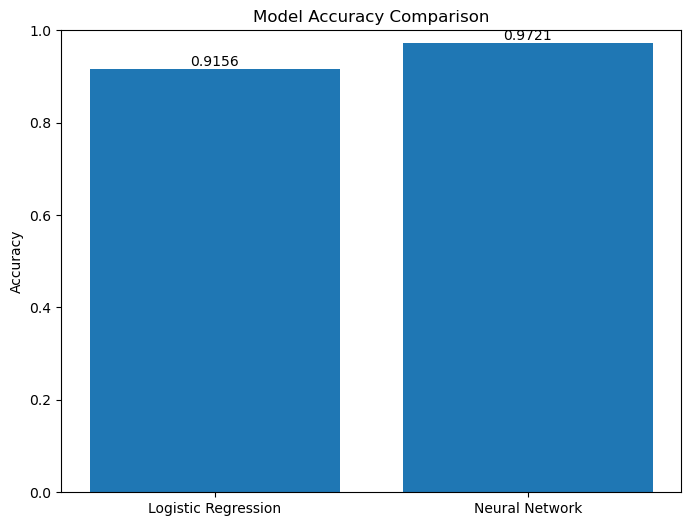

In [ ]:
# Provide your code for part 4-1 here
import matplotlib.pyplot as plt

# Create data for the bar plot
models = ['Logistic Regression', 'Neural Network']
accuracies = [lr_accuracy, nn_accuracy]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies)

# Customize the plot
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis from 0 to 1 since accuracy is between 0 and 1

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.show()


Logistic Regression Accuracy: 0.9156

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.95      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1

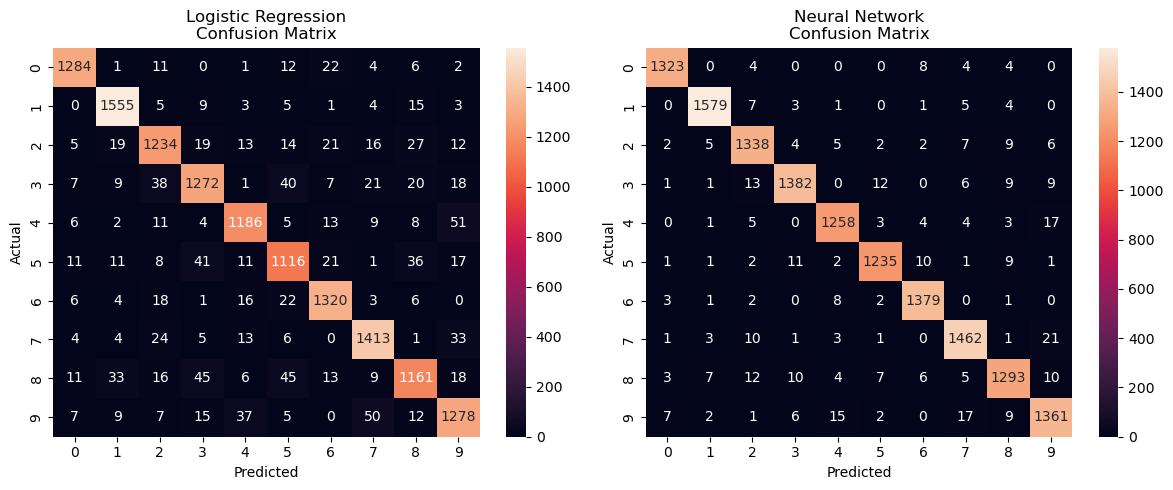

In [ ]:
# Provide your code for part 4-2 here
#First train Logistic Regression model and get predictions
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Get predictions for Logistic Regression
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

# Now we can create the classification reports and confusion matrices
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))
print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_predictions))

# Create confusion matrices
lr_cm = confusion_matrix(y_test, lr_predictions)
nn_cm = confusion_matrix(y_test, nn_predictions)

# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression confusion matrix
sns.heatmap(lr_cm, annot=True, fmt='d', ax=ax1)
ax1.set_title('Logistic Regression\nConfusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Neural Network confusion matrix
sns.heatmap(nn_cm, annot=True, fmt='d', ax=ax2)
ax2.set_title('Neural Network\nConfusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

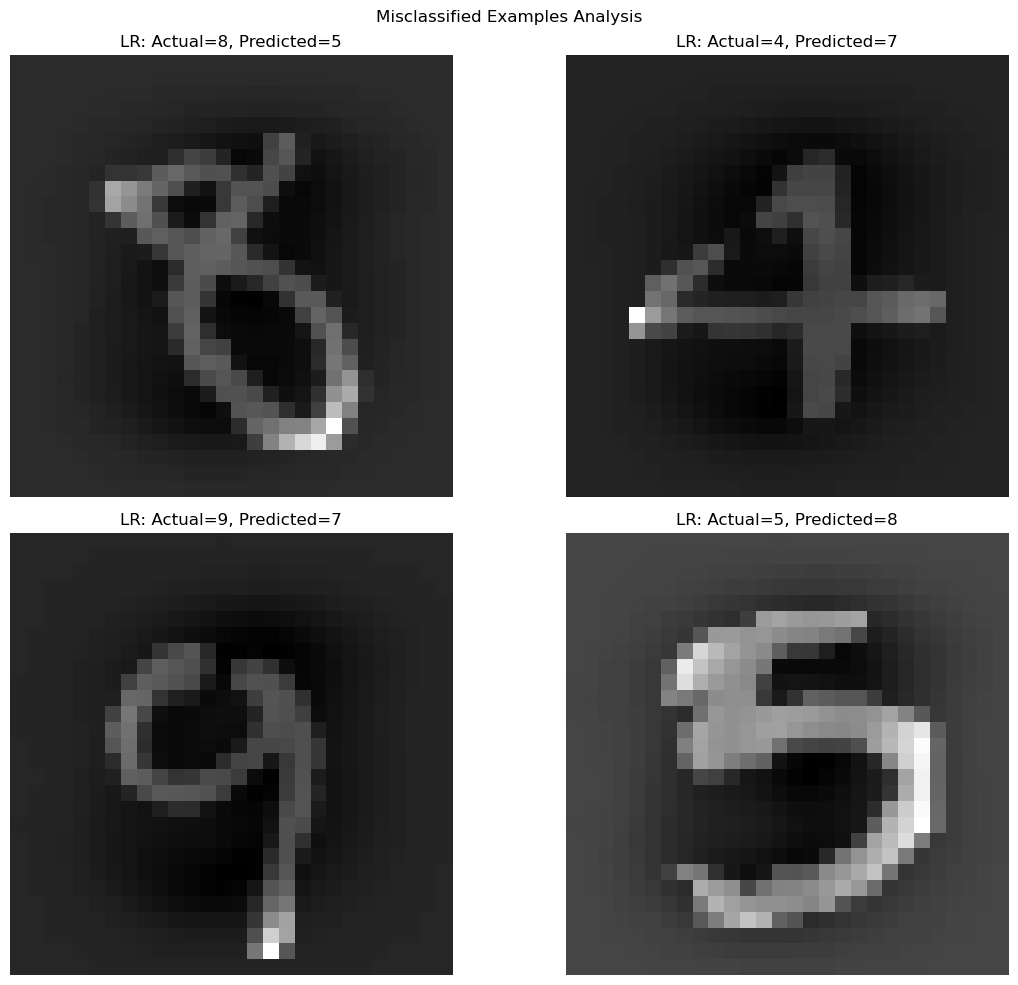

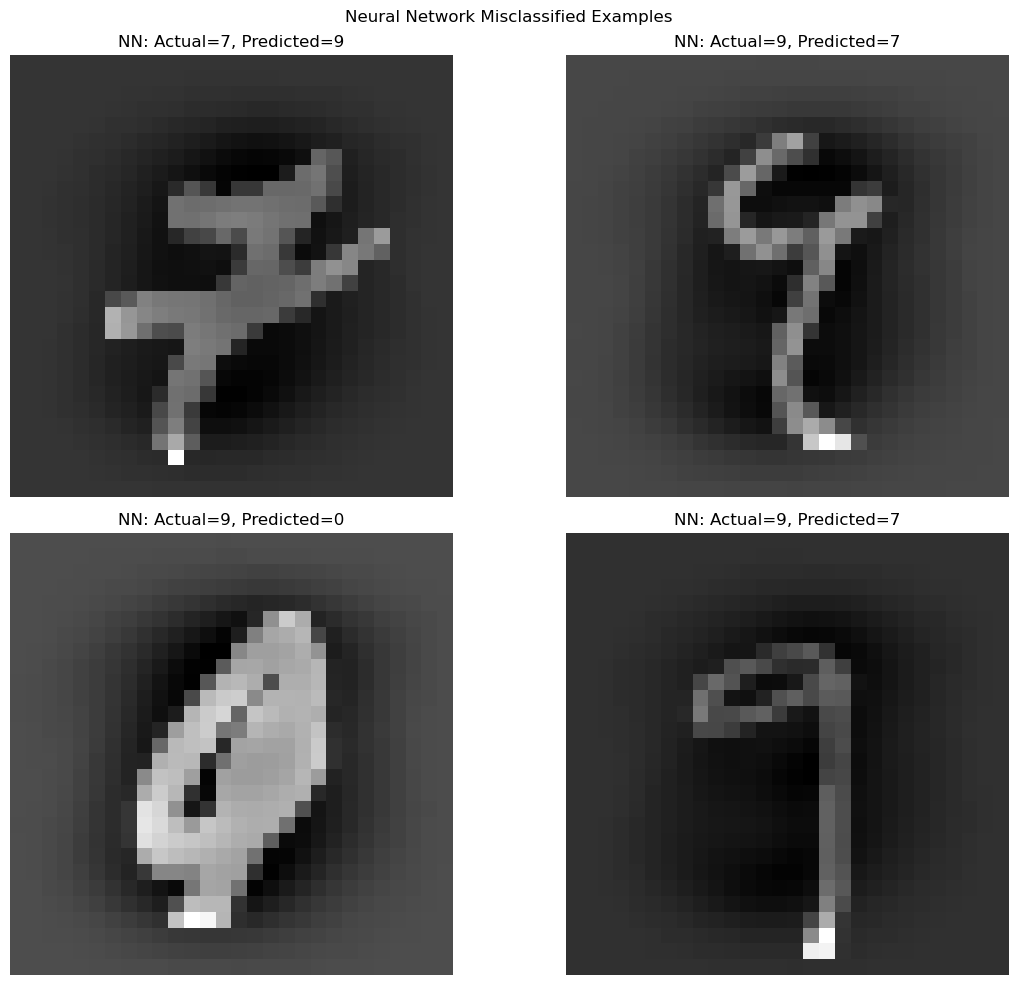


Number of misclassified examples:
Logistic Regression: 1181 out of 14000
Neural Network: 390 out of 14000


In [ ]:
# Provide your code for part 4-3 here
# Get indices of misclassified examples for both models
lr_misclassified = X_test_scaled[lr_predictions != y_test]
nn_misclassified = X_test_scaled[nn_predictions != y_test]

# Get actual and predicted labels for misclassified examples
lr_actual = y_test[lr_predictions != y_test]
lr_pred = lr_predictions[lr_predictions != y_test]
nn_actual = y_test[nn_predictions != y_test]
nn_pred = nn_predictions[nn_predictions != y_test]

# Create subplots to visualize misclassified examples
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Misclassified Examples Analysis')

# Plot first few misclassified examples for Logistic Regression
for i in range(min(4, len(lr_misclassified))):
    img = lr_misclassified[i].reshape(28, 28)  # Changed from 8,8 to 28,28
    if i < 2:
        ax = axes[0][i]
    else:
        ax = axes[1][i-2]
    ax.imshow(img, cmap='gray')
    ax.set_title(f'LR: Actual={lr_actual[i]}, Predicted={lr_pred[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Create similar visualization for Neural Network misclassifications
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Neural Network Misclassified Examples')

for i in range(min(4, len(nn_misclassified))):
    img = nn_misclassified[i].reshape(28, 28)  # Changed from 8,8 to 28,28
    if i < 2:
        ax = axes[0][i]
    else:
        ax = axes[1][i-2]
    ax.imshow(img, cmap='gray')
    ax.set_title(f'NN: Actual={nn_actual[i]}, Predicted={nn_pred[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nNumber of misclassified examples:")
print(f"Logistic Regression: {len(lr_misclassified)} out of {len(X_test_scaled)}")
print(f"Neural Network: {len(nn_misclassified)} out of {len(X_test_scaled)}")